In [1]:
#pip install eli5



   -------------------- ------------------- 1/2 [eli5]
   -------------------- ------------------- 1/2 [eli5]
   ---------------------------------------- 2/2 [eli5]



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,ConfusionMatrixDisplay,mean_squared_error

warnings.filterwarnings('ignore')

# DATA DESCRIPTION

ID: Identification number

Diagnosis: Malignant (M) or benign (B)

Mean Measurements: Radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension

Standard Error (SE) Measurements: SE versions of mean measurements

"Worst" or Largest Mean Values: Worst or largest mean values for mean measurements


This dataset is often used for breast cancer diagnosis and prognosis analysis.

### Goal: predict as many as True Positive out of Actual Positive (high recall)

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
mapDiag = {'B': 0,'M': 1}
df['diagnosis'] = df['diagnosis'].map(mapDiag)

In [7]:
features = list(df.columns[2:32])
X = df[features]
y = df['diagnosis']

In [8]:
discrete_features = X.dtypes==int
mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features)

mi_scores = pd.Series(mi_scores,name ='MI Scores',index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores


perimeter_worst            0.474112
area_worst                 0.465433
radius_worst               0.450459
concave points_mean        0.436980
concave points_worst       0.435993
perimeter_mean             0.403563
concavity_mean             0.371804
radius_mean                0.366925
area_mean                  0.357444
area_se                    0.336720
concavity_worst            0.312925
perimeter_se               0.271682
radius_se                  0.245885
compactness_worst          0.224158
compactness_mean           0.213041
concave points_se          0.123609
texture_worst              0.120484
concavity_se               0.118571
smoothness_worst           0.098216
texture_mean               0.098111
symmetry_worst             0.090147
smoothness_mean            0.084014
compactness_se             0.073803
fractal_dimension_worst    0.067290
symmetry_mean              0.064762
fractal_dimension_se       0.036455
smoothness_se              0.017654
symmetry_se                0

# TRAIN TEST SPLIT

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# RANDOM FOREST CLASSIFIER

The recall score of the Random Forest is 92.5373%


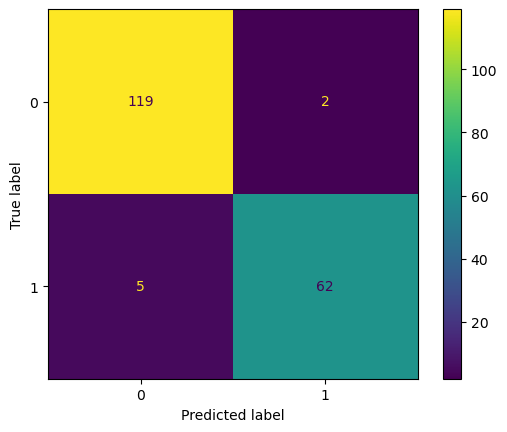

In [10]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(random_state=42).fit(X_train,y_train)
RF_y_pred = RFmodel.predict(X_test)
rfrecall = recall_score(y_test,RF_y_pred)

print(f"The recall score of the Random Forest is {round(rfrecall*100,4)}%")
ConfusionMatrixDisplay.from_estimator(RFmodel,X_test,y_test)

In [11]:
#pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 5.7 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


In [12]:
# print(x_train.shape)
print(X_train.shape)    
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(381, 30)
(188, 30)
(381,)
(188,)


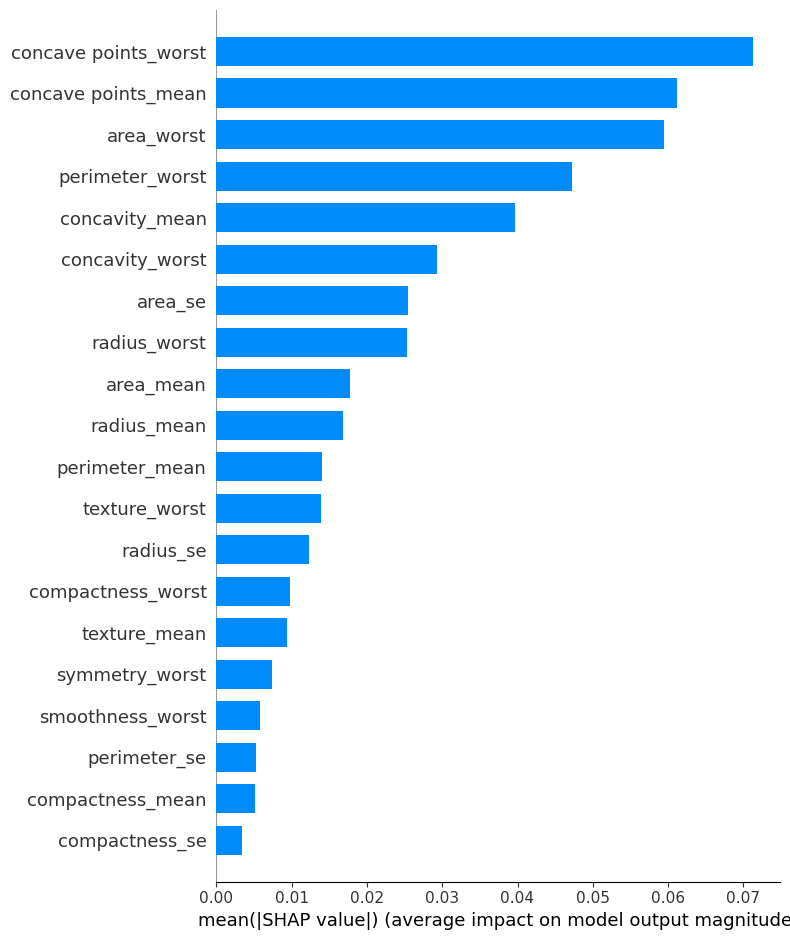

In [13]:
import shap
import matplotlib.pyplot as plt

# Create object that can calculate Shap values
explainer = shap.TreeExplainer(RFmodel)

# Calculate Shap values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize Shapley values for the positive class (index 1)
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", show=False)
plt.show()



In [14]:
#pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 8.3 MB/s eta 0:00:07
   -- ------------------------------------- 3.4/56.8 MB 10.2 MB/s eta 0:00:06
   --- ------------------------------------ 5.5/56.8 MB 9.7 MB/s eta 0:00:06
   ----- ---------------------------------- 7.9/56.8 MB 10.0 MB/s eta 0:00:05
   ------- -------------------------------- 10.0/56.8 MB 10.1 MB/s eta 0:00:05
   -------- ------------------------------- 12.1/56.8 MB 10.1 MB/s eta 0:00:05
   ---------- ----------------------------- 14.4/56.8 MB 10.3 MB/s eta 0:00:05
   ----------- ---------------------------- 16.3/56.8 MB 10.2 MB/s eta 0:00:04
   ------------ --------------------------- 18.4/56.8 MB 10.1 MB/s eta 0:00:04
   -------------- ------------------------- 20.7/56.8 MB 10.2 MB/s eta 0:00:04
   ---------------- ----------------------- 23.1/56.8 MB 10.3 MB/s eta 0:00:04
   ----------------- ---------------------- 25.4/56.8 MB 10.3 MB/s 

# xg boost

The recall score of the XGB is 95.5224%


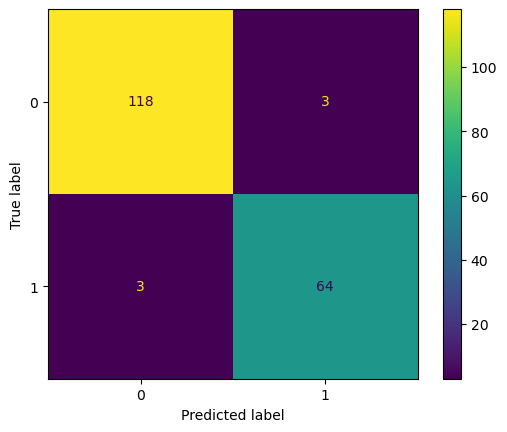

In [15]:
import xgboost as xgb
from sklearn.metrics import recall_score, ConfusionMatrixDisplay

# Move eval_metric to constructor
XGBmodel = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.5,
    max_depth=5,
    objective="binary:logistic",
    eval_metric='logloss'
)

XGBmodel.fit(X_train, y_train)

XGB_y_pred = XGBmodel.predict(X_test)
xgrecall = recall_score(y_test, XGB_y_pred)

print(f"The recall score of the XGB is {round(xgrecall*100, 4)}%")

ConfusionMatrixDisplay.from_estimator(XGBmodel, X_test, y_test)


### Optimize the XGB by tuning hyperparameter and Cross-Validation:
1. max_depth: the maximum depth of a tree
2. learning_rate: Same as the learning rate in CNNs
3. gamma: A note is split only when the resulting split gives a positive reduction in the loss function
4. reg_lambda: L2 regularization term on weights(analogous to Ridge regression)
5. scale_pos_weight: It controls the balance of positive and negative weights. It is useful for imbalanced classes. A value greater than 0 should be used in case of high-class imbalance as it helps in faster convergence

* GridSearchCV is a popular method to find the optimal parameters in the models.
* subsample: Subsample ratio of the training instances. Setting it to 0.9 means that XGBoost would randomly sample 90% of the training data before growing trees, and this will prevent overfitting. Subsampling will occur once   in every boosting iteration
* colsample_bytree: specify the fraction of columns to be subsampled


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 1}
The recall score of the tuned XGBoost model is 98.5075%


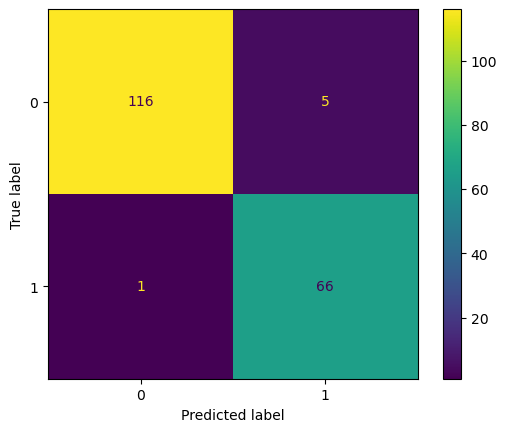

In [16]:
# Imports
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, ConfusionMatrixDisplay

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 3, 5]
}

# Create the base XGBClassifier with eval_metric set in constructor
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    seed=42
)

# GridSearchCV setup
optimal_parameters = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',   # You can change this to 'recall' or other if needed
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
optimal_parameters.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", optimal_parameters.best_params_)

# Evaluate best estimator
best_model = optimal_parameters.best_estimator_
y_pred = best_model.predict(X_test)

# Recall score
recall = recall_score(y_test, y_pred)
print(f"The recall score of the tuned XGBoost model is {round(recall*100, 4)}%")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)


In [27]:
print(optimal_parameters.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)


#### which gives us the parameters: gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10.0, scale_pos_weight=5

The recall score of the optimized XGB is 95.5224%


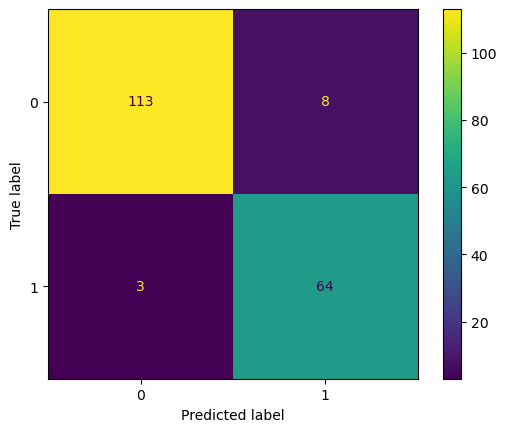

In [28]:
import xgboost as xgb
from sklearn.metrics import recall_score, ConfusionMatrixDisplay

# Create and train the model (eval_metric moved to constructor)
XGBmodel = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.5,
    max_depth=5,
    objective="binary:logistic",
    gamma=1.0,
    reg_lambda=10.0,
    scale_pos_weight=3,
    eval_metric='logloss'  
)

XGBmodel.fit(X_train, y_train)

# Make predictions
XGB_y_pred = XGBmodel.predict(X_test)

# Calculate recall
xgrecall = recall_score(y_test, XGB_y_pred)
print(f"The recall score of the optimized XGB is {round(xgrecall * 100, 4)}%")

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(XGBmodel, X_test, y_test)


#### The optimized XG boost performs better than Random Forest  by increasing recall from 92% to 97%. 

# Learnings


**Model Interpretability:**

Random Forest's feature importance scores provide straightforward insights into which features are most influential in predictions, aiding interpretability.
XGBoost's complexity can make interpretation challenging, requiring additional techniques like SHAP values for deeper insights.

**Performance and Efficiency:**

XGBoost often offers superior predictive performance compared to Random Forest, especially in tasks with complex relationships or large datasets.
However, Random Forest can be more efficient in terms of training time and computational resources, making it preferable for certain scenarios.

**Hyperparameter Tuning:**

Fine-tuning hyperparameters is crucial for optimizing model performance in both Random Forest and XGBoost.
Techniques like grid search or random search can efficiently identify optimal hyperparameter configurations, enhancing model effectiveness.

The recall score of the AdaBoost model is 95.5224%


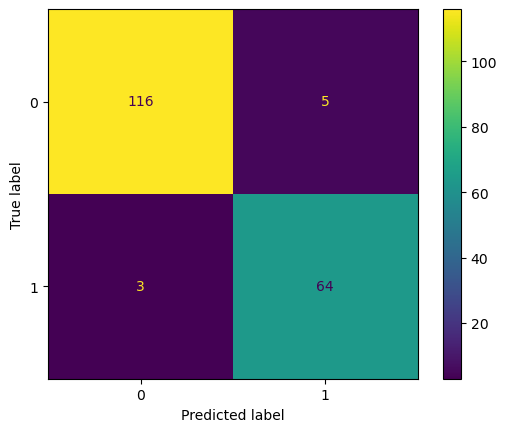

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score, ConfusionMatrixDisplay

# Create and train AdaBoost model
ADAmodel = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ADAmodel.fit(X_train, y_train)

# Make predictions
ADA_y_pred = ADAmodel.predict(X_test)

# Calculate recall score
adarecall = recall_score(y_test, ADA_y_pred)
print(f"The recall score of the AdaBoost model is {round(adarecall * 100, 4)}%")

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(ADAmodel, X_test, y_test)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 150}
The recall score of the tuned AdaBoost model is 94.0299%


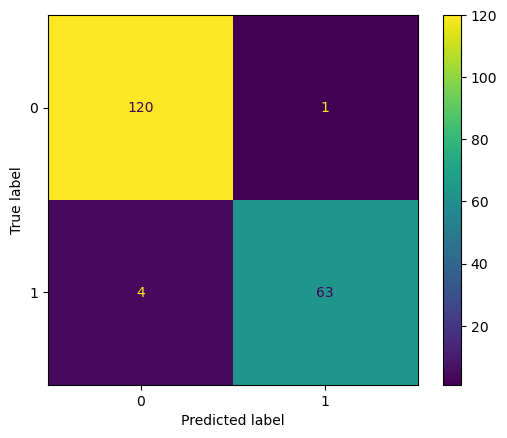

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, ConfusionMatrixDisplay

# Define parameter grid with updated parameter name: 'estimator' instead of 'base_estimator'
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.3, 0.5, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=2),
                  DecisionTreeClassifier(max_depth=3)]
}

# Initialize AdaBoost model
ada = AdaBoostClassifier(random_state=42)

# Setup GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring='roc_auc',   # Use 'roc_auc' or 'f1' if needed
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_ada.fit(X_train, y_train)

# Best estimator
best_ada = grid_search_ada.best_estimator_

# Make predictions and evaluate recall
ADA_y_pred = best_ada.predict(X_test)
adarecall = recall_score(y_test, ADA_y_pred)

# Output results
print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)
print(f"The recall score of the tuned AdaBoost model is {round(adarecall * 100, 4)}%")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_ada, X_test, y_test)


Recall score of optimized AdaBoost: 91.0448%


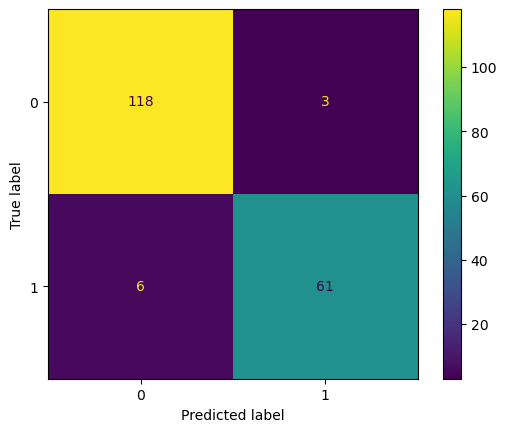

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, ConfusionMatrixDisplay

# Optimized AdaBoost with tuned parameters
best_ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),  # or max_depth=3 based on GridSearch results
    n_estimators=100,
    learning_rate=0.3,
    random_state=42
)

# Fit model
best_ada_model.fit(X_train, y_train)

# Predict
ada_y_pred = best_ada_model.predict(X_test)

# Evaluate recall
ada_recall = recall_score(y_test, ada_y_pred)
print(f"Recall score of optimized AdaBoost: {round(ada_recall * 100, 4)}%")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_ada_model, X_test, y_test)
